# Predict arrival delay with sklearn
# ----------------------------------------------

# Data loading

In [18]:
BASIC_PATH = '../Data/'
ALL_FILES = BASIC_PATH + '*.csv'

import pandas as pd
import numpy as np
import glob as glob

def readAllFiles():
    files = glob.glob(ALL_FILES)
    frames = []

    for file in files:
        df = pd.read_csv(file, index_col = 0)
        frames.append(df)

    return pd.concat(frames)

df = readAllFiles()

# Remove columns not necessary for machine learning

In [ ]:
df['month'] = pd.to_datetime(df.date).map(lambda x: x.month)

In [ ]:
df = df.drop(['date', 
              'airline_code', 
              'departure_airport', 
              'departure_lat', 
              'departure_lon', 
              'departure_schedule', 
              'arrival_airport', 
              'arrival_lat', 
              'arrival_lon', 
              'arrival_schedule', 
              'departure_actual', 
              'arrival_actual', 
              'arrival_tz', 
              'departure_tz'], axis=1)

In [ ]:
df.columns

# Split into test and train, split into x and y, use pandas.get_dummies

In [ ]:
from sklearn.model_selection import train_test_split
import gc

X = df.loc[:,['airline', 
              'departure_state', 
              'departure_delay',
              'distance', 
              'speed', 
              'month']]
X = pd.get_dummies(X, columns=['airline', 
                               'departure_state', 
                               'month'])

y = df.loc[:,['arrival_delay']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#make place in memory
del df
del X
del y
gc.collect()

# Random Forest Regressor model (good model)

### Make model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfrm = RandomForestRegressor()
rfrm.fit(X_train, y_train.values.ravel())

rfrm_y_predict = rfrm.predict(X_test)

### Test model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rfrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, rfrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, rfrm_y_predict))

#Graph
plt.scatter(y_test.iloc[:500,:].index, y_test.iloc[:500,:].arrival_delay, c='b')
predictDf = pd.DataFrame( data=rfrm_y_predict, index=y_test.index)
plt.scatter(predictDf.iloc[:500,:].index, predictDf.iloc[:500,0], c='r')
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

# Linear Regression model (best model)

### Make model

In [ ]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(X_train, y_train)

lrm_y_predict = lrm.predict(X_test)

### Test model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, lrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, lrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, lrm_y_predict))

#Graph
plt.scatter(y_test.iloc[:500,:].index, y_test.iloc[:500,:].arrival_delay, c='b')
predictDf = pd.DataFrame( data=lrm_y_predict, index=y_test.index)
plt.scatter(predictDf.iloc[:500,:].index, predictDf.iloc[:500,0], c='r')
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

# Ridge Regression model (good model if alpha is small)

### Make model

In [ ]:
from sklearn.linear_model import Ridge

rrm = Ridge(alpha=0.01, normalize=True)
rrm.fit(X_train, y_train.values.ravel())

rrm_y_predict = rrm.predict(X_test)

### Test model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, rrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, rrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, rrm_y_predict))

# Lasso Regression model (bad model)

### Make model

In [ ]:
from sklearn.linear_model import Lasso

lrm = Lasso(alpha=0.01, normalize=True)
lrm.fit(X_train, y_train.values.ravel())

lrm_y_predict = lrm.predict(X_test)

### Test model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, lrm_y_predict))

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, lrm_y_predict))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.5f' % r2_score(y_test, lrm_y_predict))

# Classification

## Prepare dataset

In [19]:
df = df[0:100000] ## Shrink dataset for faster iteration
df['month'] = pd.to_datetime(df.date).map(lambda x: x.month)
df["arrival_delay"] = df["arrival_delay"].map(lambda delay: 0 if delay < 5 else 1)
df.departure_schedule = pd.to_datetime(df.departure_schedule)
df.arrival_schedule = pd.to_datetime(df.arrival_schedule)
df.departure_schedule = df.departure_schedule.map(lambda x: x.hour * 60 + x.minute)
df.arrival_schedule = df.arrival_schedule.map(lambda x: x.hour * 60 + x.minute)
df = df.drop(['date', 
              'airline_code', 
              'departure_delay',
              'departure_state', 
              'departure_lat', 
              'departure_lon', 
              'arrival_state', 
              'arrival_lat', 
              'arrival_lon', 
              'departure_actual', 
              'arrival_actual', 
              'arrival_tz', 
              'departure_tz'], axis=1)

## Create training and test data

In [20]:
from sklearn.model_selection import train_test_split

X = df.loc[:,['airline',
              'departure_airport',
              'arrival_airport',
              'departure_schedule',
              'arrival_schedule',
              'distance', 
              'speed', 
              'month']]
X = pd.get_dummies(X, columns=['airline', 
                               'departure_airport',
                               'arrival_airport',
                               'month'])

y = df.loc[:,['arrival_delay']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Clean memory

In [21]:
import gc

del df
gc.collect()

115

## Random Forrest classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## K Nearest Neighbors classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Show confusion matrixes of all models

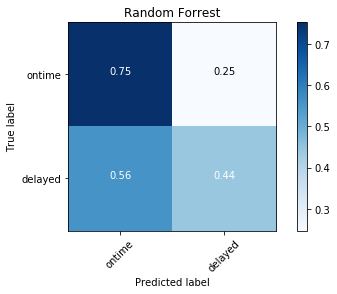

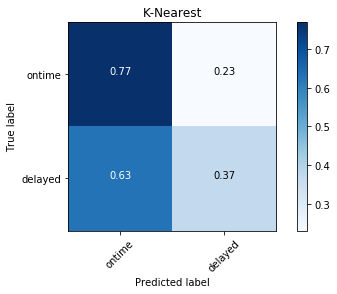

In [24]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ["ontime", "delayed"]

models = [
    { "name": "Random Forrest", "model": rfc },
    { "name": "K-Nearest", "model": knn }
]
for model in models:
    # Compute confusion matrix
    pred = model["model"].predict(X_test)
    cnf_matrix = confusion_matrix(y_test, pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title=model["name"])
    plt.show()